In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join("..", "assets", "inference-results", "isolated")

ce_dir = os.path.join(data_dir, "cross-entropy", "grad-accumulation")
fl_dir = os.path.join(data_dir, "focal-loss", "grad-accumulation")

all([os.path.isdir(ce_dir), os.path.isdir(fl_dir)])

True

In [3]:
splits = [split for split in os.listdir(ce_dir)]

ce_splits = [os.path.join(ce_dir, split) for split in splits]
fl_splits = [os.path.join(fl_dir, split) for split in splits]

In [4]:
ce_parquets = [os.path.join(split, "attention-mil-instance-weights.parquet") for split in ce_splits]

fl_parquets = [os.path.join(split, "attention-mil-instance-weights.parquet") for split in fl_splits]

In [5]:
cols = ["patient_id", "attention_weights"]
ce_dfs = pd.DataFrame(columns=cols)

for f in ce_parquets:
    ce_df = pd.read_parquet(f)
    ce_df["attention_weights"] = ce_df["attention_weights"].map(lambda x: (x - x.min()) / (x.max() - x.min()))
    ce_dfs = pd.concat([ce_dfs, ce_df], ignore_index=True)

ce_concatenated_attention = np.concat(ce_dfs["attention_weights"])

In [6]:
cols = ["patient_id", "attention_weights"]
fl_dfs = pd.DataFrame(columns=cols)

for f in fl_parquets:
    fl_df = pd.read_parquet(f)
    fl_df["attention_weights"] = fl_df["attention_weights"].map(lambda x: (x - x.min()) / (x.max() - x.min()))
    fl_dfs = pd.concat([fl_dfs, fl_df], ignore_index=True)

fl_concatenated_attention = np.concat(fl_dfs["attention_weights"])

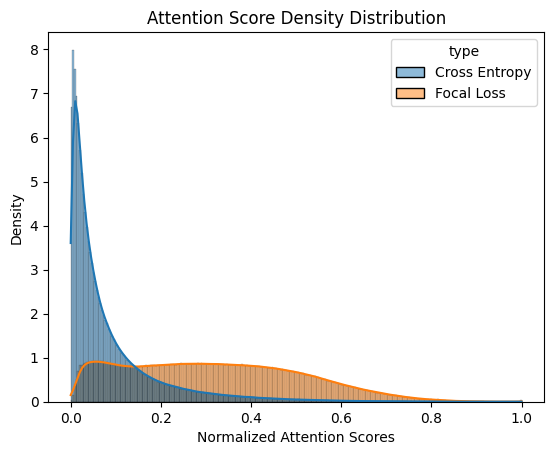

In [7]:
combined_df = pd.DataFrame({
    "attention_weights": np.concat([ce_concatenated_attention, fl_concatenated_attention]),
    "type": ["Cross Entropy"] * len(ce_concatenated_attention) + ["Focal Loss"] * len(fl_concatenated_attention)
})

# plt.figure(figsize=(12, 6))
sns.histplot(
    data=combined_df, 
    x="attention_weights", 
    hue="type", 
    bins="auto", 
    kde=True, 
    stat="density"
    )

plt.title("Attention Score Density Distribution")
plt.xlabel("Normalized Attention Scores")
plt.ylabel("Density")

plt.show()

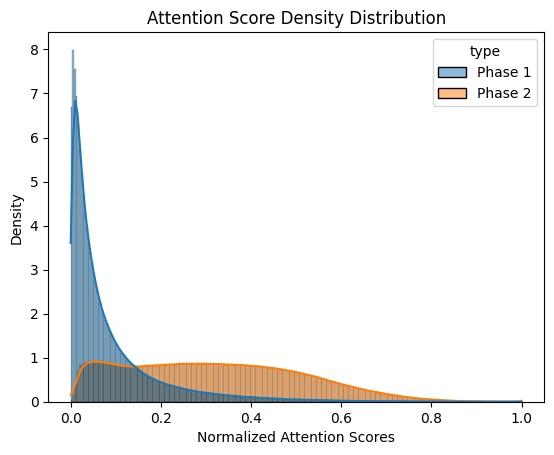

In [8]:
combined_df = pd.DataFrame({
    "attention_weights": np.concat([ce_concatenated_attention, fl_concatenated_attention]),
    "type": ["Phase 1"] * len(ce_concatenated_attention) + ["Phase 2"] * len(fl_concatenated_attention)
})

# plt.figure(figsize=(12, 6))
sns.histplot(
    data=combined_df, 
    x="attention_weights", 
    hue="type", 
    bins="auto", 
    kde=True, 
    stat="density"
    )

plt.title("Attention Score Density Distribution")
plt.xlabel("Normalized Attention Scores")
plt.ylabel("Density")

plt.show()

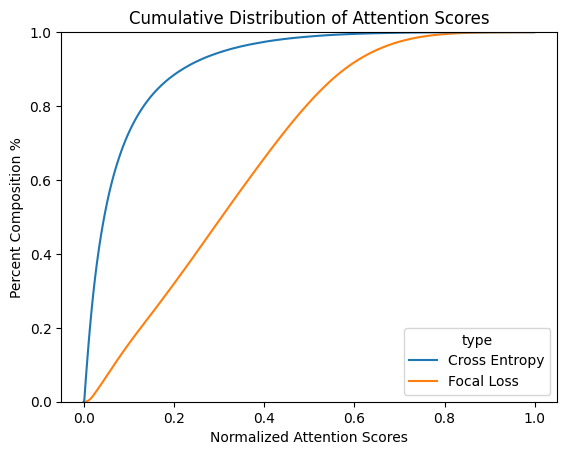

In [8]:
# plt.figure(figsize=(8, 8))
sns.ecdfplot(
    data=combined_df, 
    x="attention_weights", 
    hue="type", 
    stat="proportion"
    )

plt.title("Cumulative Distribution of Attention Scores")
plt.xlabel("Normalized Attention Scores")
plt.ylabel("Percent Composition %")

plt.show()

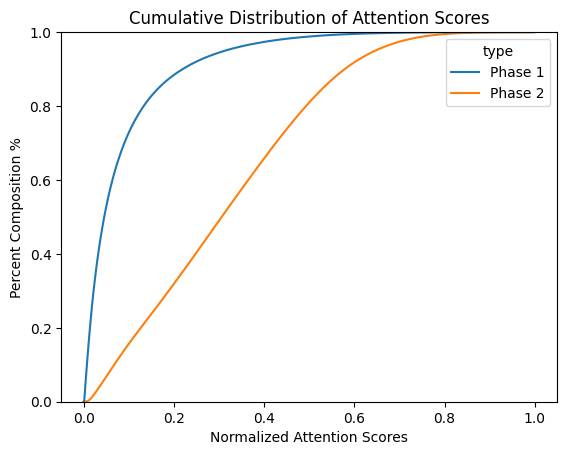

In [9]:
# plt.figure(figsize=(8, 8))
sns.ecdfplot(
    data=combined_df, 
    x="attention_weights", 
    hue="type", 
    stat="proportion"
    )

plt.title("Cumulative Distribution of Attention Scores")
plt.xlabel("Normalized Attention Scores")
plt.ylabel("Percent Composition %")

plt.show()

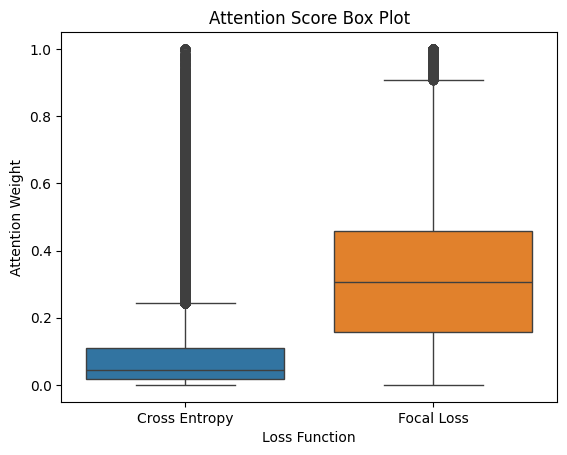

In [9]:
# plt.figure(figsize=(8, 8))
sns.boxplot(x="type", y="attention_weights", data=combined_df, hue="type")
plt.title("Attention Score Box Plot")
plt.xlabel("Loss Function")
plt.ylabel("Attention Weight")
plt.show()

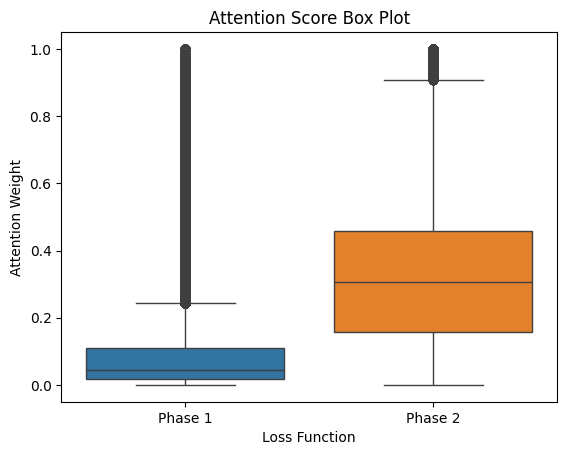

In [11]:
# plt.figure(figsize=(8, 8))
sns.boxplot(x="type", y="attention_weights", data=combined_df, hue="type")
plt.title("Attention Score Box Plot")
plt.xlabel("Loss Function")
plt.ylabel("Attention Weight")
plt.show()

In [10]:
ce_df_test = pd.read_parquet(ce_parquets[0])
ce_df_test["attention_weights"] = ce_df_test["attention_weights"].map(lambda x: (x - x.min()) / (x.max() - x.min()))

ce_df_test.head()

,patient_id,attention_weights
0,14917C,"[0.014306719, 0.015673196, 0.013457889, 0.0155..."
1,16421,"[0.027221013, 0.023897085, 0.01923266, 0.00560..."
2,11293,"[0.030792331, 0.017403731, 0.041909818, 0.0688..."
3,14696B,"[0.008335913, 0.011395289, 0.00418025, 0.01333..."
4,13645,"[0.020124326, 0.023008393, 0.015153953, 0.0216..."


In [11]:
fl_df_test = pd.read_parquet(fl_parquets[0])
fl_df_test["attention_weights"] = fl_df_test["attention_weights"].map(lambda x: (x - x.min()) / (x.max() - x.min()))

fl_df_test.head()

,patient_id,attention_weights
0,14917C,"[0.21000342, 0.23331131, 0.20958428, 0.2452151..."
1,16421,"[0.24543594, 0.2279877, 0.24398257, 0.21331155..."
2,11293,"[0.23335479, 0.21706581, 0.18948369, 0.3178776..."
3,14696B,"[0.1317889, 0.17387077, 0.073231265, 0.0829488..."
4,13645,"[0.16219383, 0.13928854, 0.11109364, 0.1671657..."


In [12]:
ce_concatenated_attention = np.concat(ce_df_test["attention_weights"])

fl_concatenated_attention = np.concat(fl_df_test["attention_weights"])

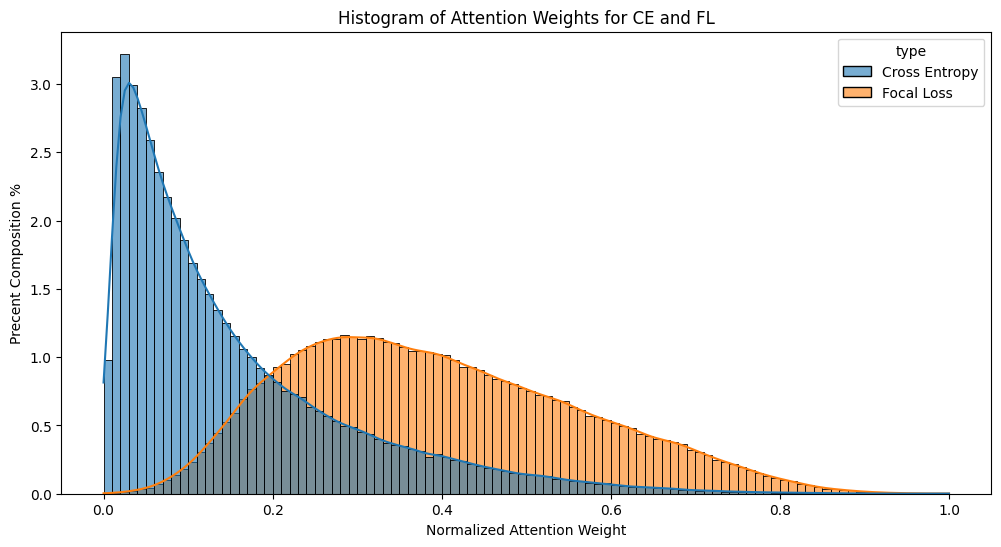

In [13]:
combined_df = pd.DataFrame({
    "attention_weights": np.concatenate([ce_concatenated_attention, fl_concatenated_attention]),
    "type": ["Cross Entropy"] * len(ce_concatenated_attention) + ["Focal Loss"] * len(fl_concatenated_attention)
})

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x="attention_weights", hue="type", bins=100, kde=True, stat="percent", alpha=0.6)

plt.title("Histogram of Attention Weights for CE and FL")
plt.xlabel("Normalized Attention Weight")
plt.ylabel("Precent Composition %")

plt.show()

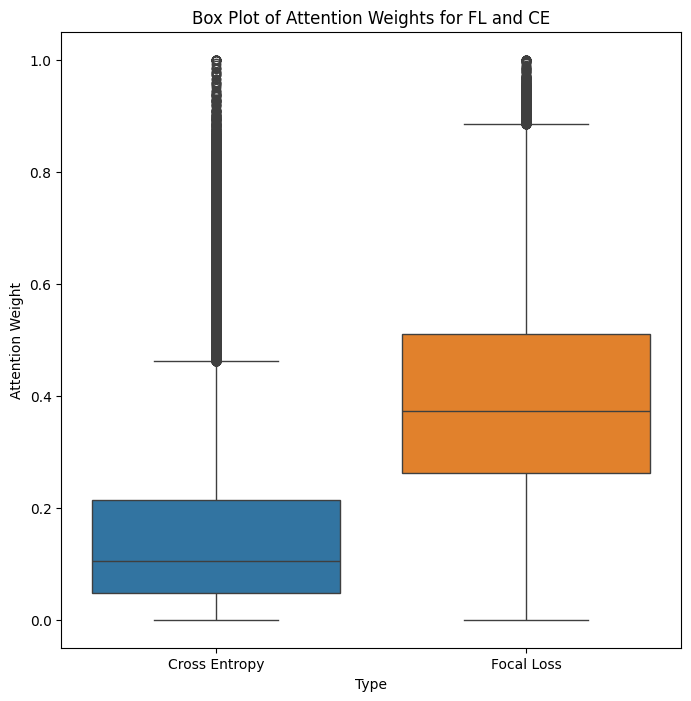

In [14]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="type", y="attention_weights", data=combined_df, hue="type")
plt.title("Box Plot of Attention Weights for FL and CE")
plt.xlabel("Type")
plt.ylabel("Attention Weight")
plt.show()

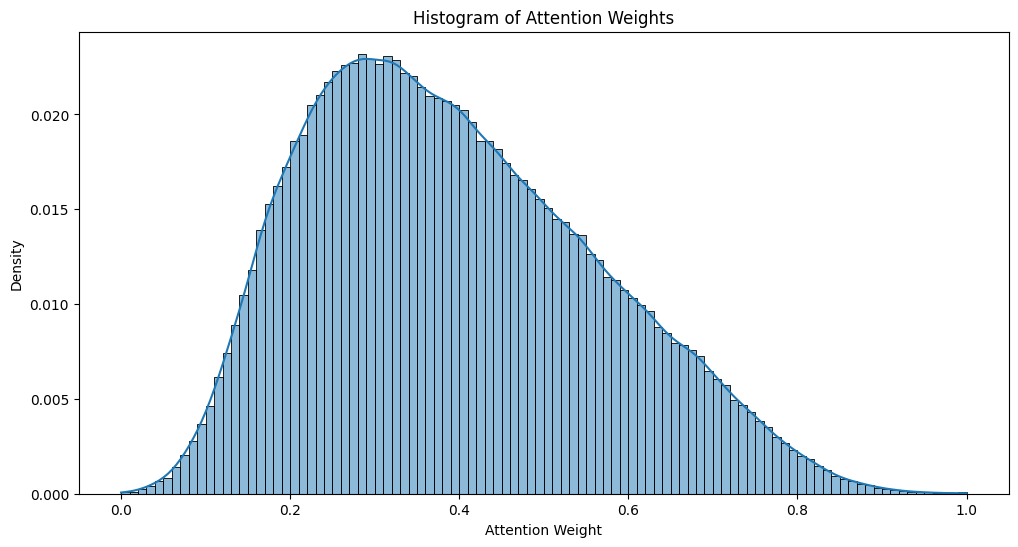

In [15]:
# FL

plt.figure(figsize=(12, 6))
sns.histplot(fl_concatenated_attention, bins=100, kde=True, stat="probability")
plt.title("Histogram of Attention Weights")
plt.xlabel("Attention Weight")
plt.ylabel("Density")
plt.show()

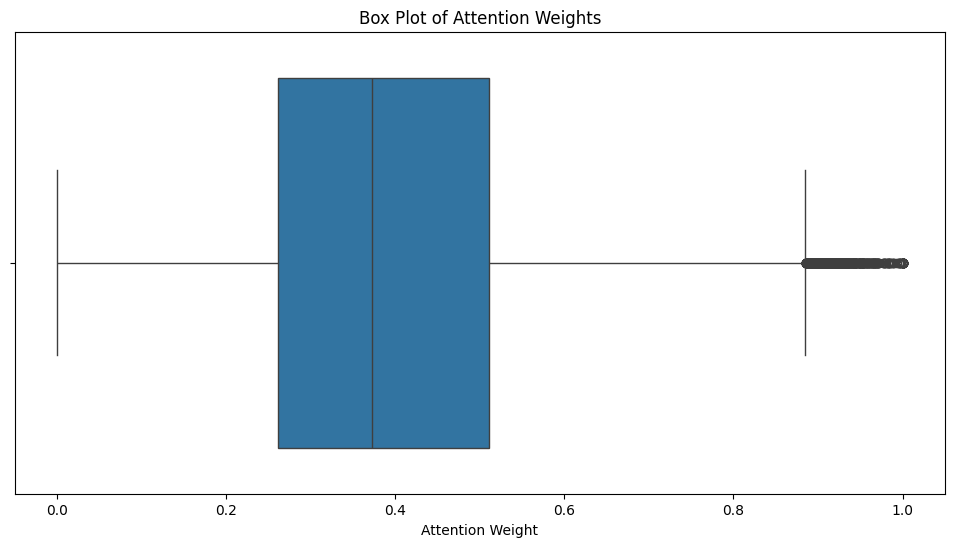

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=fl_concatenated_attention.flatten())
plt.title("Box Plot of Attention Weights")
plt.xlabel("Attention Weight")
plt.show()

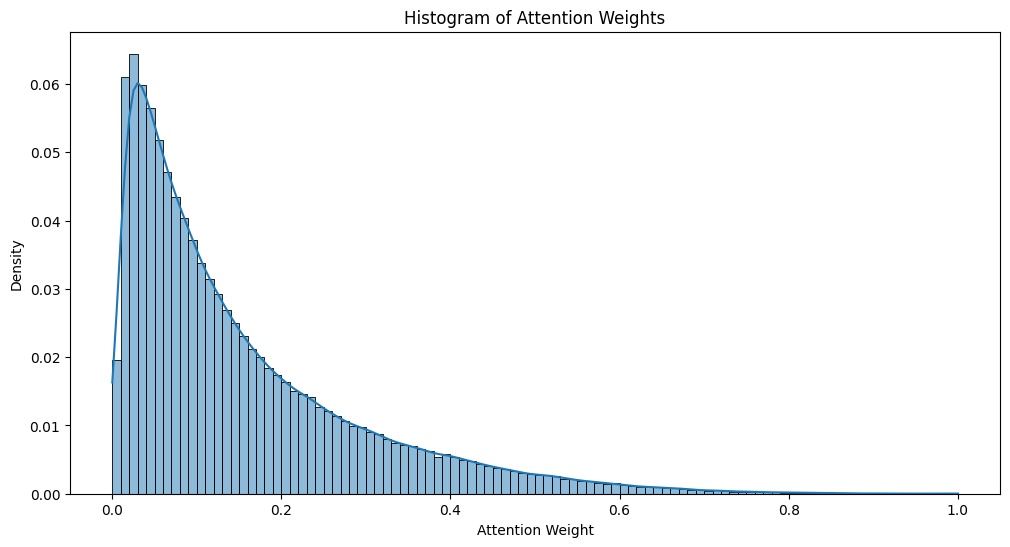

In [17]:
# CE

plt.figure(figsize=(12, 6))
sns.histplot(ce_concatenated_attention, bins=100, kde=True, stat="probability")
plt.title("Histogram of Attention Weights")
plt.xlabel("Attention Weight")
plt.ylabel("Density")
plt.show()

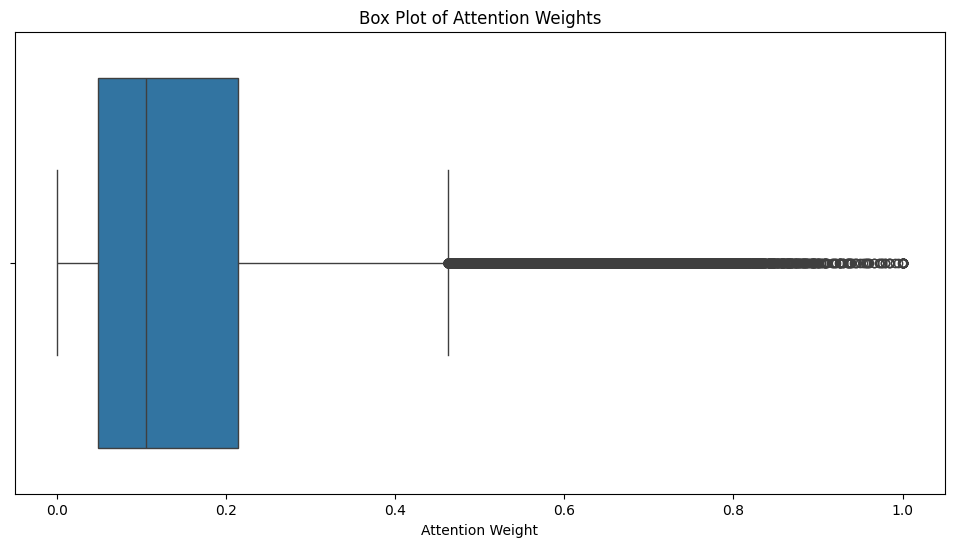

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=ce_concatenated_attention.flatten())
plt.title("Box Plot of Attention Weights")
plt.xlabel("Attention Weight")
plt.show()